# The Class architecture of ClemGame

Starting off, below is a UML representation of how the ClemGame classes are connected to each other: <br>
___

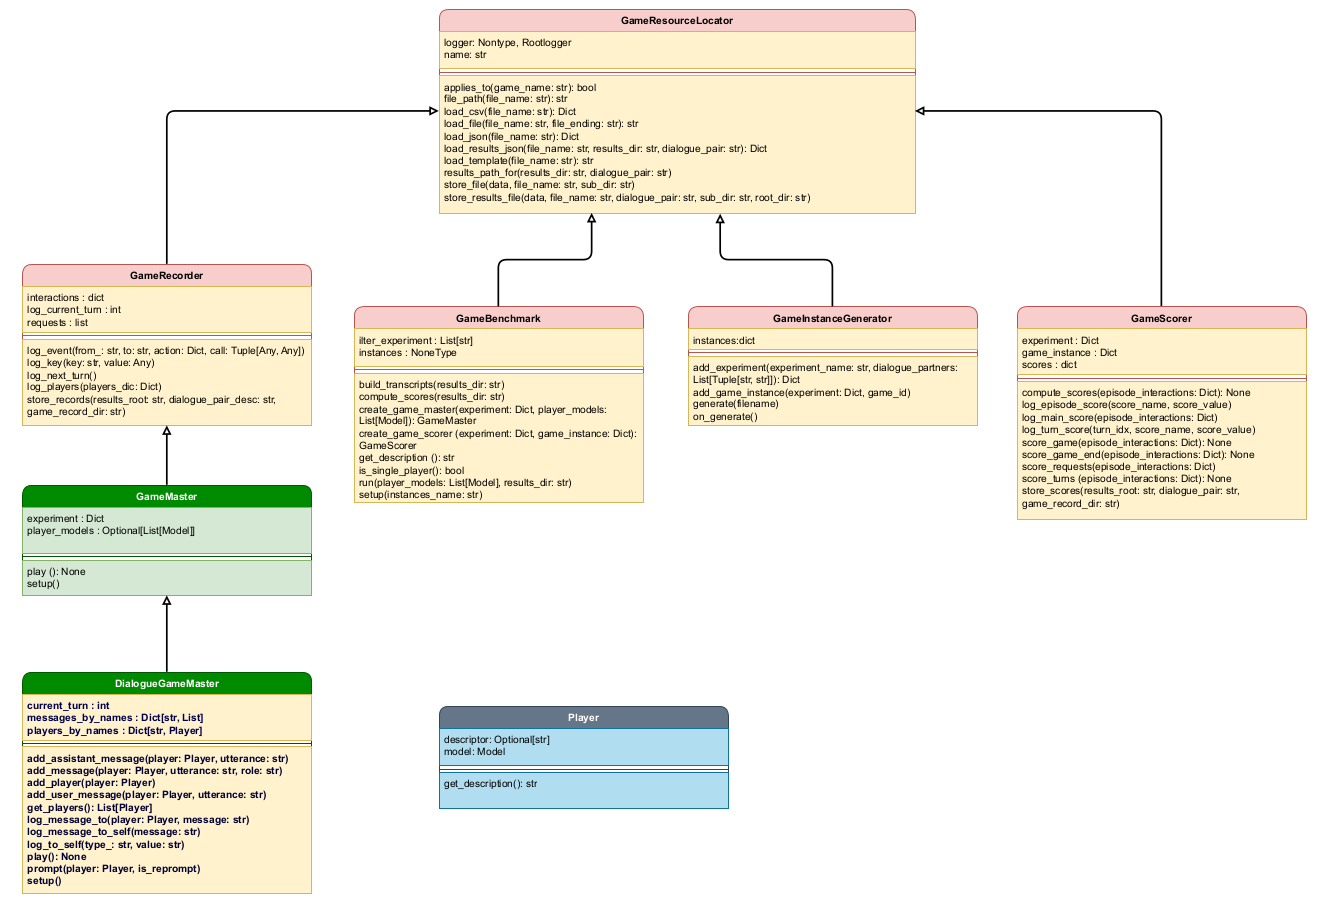

In [4]:
from IPython.display import display, Image
img = Image(filename='utils/clem_game_classes.png')
display(img)

# `GameResourceLocator`
___
- This is the main class in the ClemGame Architecture. `(abc.ABC):` It's an abstract class that should be subclassed <br>
As the Diagram above shows, almost all classes in ClemGame are inheriting this class.
- It provides methods to access, load and store files from the game directory, like **json**, **csv**, **template**. <br>
- This class knows how to refer to files, so it (and its subclasses) should be used during the implementation.
- **Game-Specific Context:** <br> The class manages resources based on the specific game's name passed during initialization **(self.name)**.
    - All resource operations are relative to this game context.

# `GameBenchMark`
___
The class is designed to organize and manage mutiple game instances as part of a benchmark. <br>
It supports setting up different experimental conditions for games and running them sequentially. <br>
The `setup()`Method loads instances from **instances.json**<br>

**Other Important Methods**
- build_transcripts(): Transcribes each interaction
- compute_scores(): Processes game results, computes scores
- run(): Executes a sequence of game instances from **instances.json**

# `GameInstanceGenerator`
___
Responsible for generating `instances.json`, with methods:
- add_experiment(): Sets up new experiment
- add_game_instance(): After creating an experiment, add instances to it
    - Each instance has a unique `game_id` and can have more specific variables
- generate(): It calls the `on_generate()` Method, which is meant to be overwritten by game-specific logic

# `GameScorer`
It maintains a scores dictionary with two components: **turn_scores** and **episode_scores**. <br>
It executes various calculations on turn/episode/game levels and stores them.


# `GameRecorder`
___
- Inherits from GameResourceLocator and extends on it with the following (most notable) Features:
- Logging Interactions, Player info, Turn info and so on
- API Call logging
- Storing logs

# `GameMaster`
- Subclass of GameRecorder.
- Accepts a **scores** dictionary and an optional list of `player_models`
- Comes with two abstract methods that need to be implemented by any subclasses (`setup,play`)

# `DialogueGameMaster`
- Inherits from **GameMaster** and is specifically designed to implement turn-based dialogue games. 
- Manages the flow of the game, logs interactions, and allows for customizable rules regarding how responses are validated, parsed, and logged.
- Provides multiple hooks for customizing gameplay, making it flexible for different types of dialogue-based games.